# Customer Churn Analysis

## 1. Business Understanding

Customer churn, also called customer attrition, refers to when users **stop doing business** with a company. In the telecom industry, this is when a subscriber **discontinues their mobile, internet, or voice service**, either by switching to a competitor or dropping service altogether.
In today's **hyper-competitive telecom market**, where customer acquisition costs are rising, **retaining existing customers** has become a **strategic necessity**.

### Why It Matters
- Acquiring new users costs **5–7× more** than retention.
- A **5% retention increase** can boost profits by **25–95%**.
- Churn rates average **1–3%**, and can exceed **6%** in emerging markets,causing major revenue loss.

### Real-World Cases
- **Vodafone UK** lost 500K users due to billing issues → adopted AI-based churn prediction.
- **MTN Nigeria** used ML to trigger automated SMS/app retention messages.
- **Safaricom (Kenya)** launched micro-campaigns to retain Gen Z users lost to Airtel.

### Common Churn Drivers

| Driver                | Description                              |
|-----------------------|------------------------------------------|
| 📶 Network Quality     | Call drops, poor internet                |
| 💬 Customer Service    | Delayed or poor support                  |
| 💸 Pricing             | Cheaper competitor offers                |
| 🧾 Billing Issues      | Errors or non-transparent charges        |
| 📱 Inflexible Plans    | Rigid bundles, roaming problems          |
| 🔍 No Personalization  | Generic experience for all users         |



## Case Focus: SyriaTel 🇸🇾

**SyriaTel**, a leading telecom in Syria, faces:
- Conflict-related infrastructure issues  
- Increased digital competition  
- Rising data demand and customer dissatisfaction

**Business Goal:** Predict customers likely to churn to:
- Take **proactive retention actions**
- Minimize **revenue leakage**
- Improve **customer satisfaction**



## Project Objective

> Develop a **binary classification model** to predict churn using customer account and service usage data.



## Stakeholders & Benefits

| Stakeholder         | Value Gained                                 |
|---------------------|-----------------------------------------------|
| Marketing Team      | Targeted retention campaigns                  |
| Customer Support    | Prioritized service to high-risk customers    |
| Product Team        | Tailored plans based on churn insights        |
| Executives          | Informed strategic decisions                  |
| Data Science Team   | Model deployment and churn tracking           |



## What Does Success Look Like?

- **High recall** on churn class (minimize missed churners)  
- Clear **feature insights** for retention strategies  
- A robust, deployable model to **reduce churn rate**

---

## 2. Data Acquisition & Preparation

### Dataset Overview

Real-world dataset from SyriaTel with **3,333 customer records**. Each row represents a customer’s:

- Demographics (e.g., area code)
- Account & plan details
- Service usage
- Support interactions
- Target: **Churn (Yes/No)**

| Attribute        | Detail                                         |
|------------------|------------------------------------------------|
| **File**         | `bigml_59c28831336c6604c800002a.csv`           |
| **Format**       | CSV (tabular)                                  |
| **Size**         | ~500 KB                                        |
| **Target**       | `Churn`                                        |
| **Missing Data** | No nulls, but empty strings (`" "`) may exist  |



### Limitations of the Data
- No Time-Series: Customer behavior is not tracked over time.
- Missing Features: No info on satisfaction, complaints, payments, etc.
- Class Imbalance: Originally biased toward non-churners.
- Anonymized Data: No personal identifiers for enrichment.
- No External Factors: Market or economic influences not capture



In [118]:
# Importing essential Libraries
#  Data Analysis & Manipulation
import pandas as pd
import numpy as np

#  Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # For interactive plots
import missingno as msno      # For missing data visualization

#  Machine Learning - Preprocessing & Modeling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

#  Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier




# 📏 Evaluation Metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    ConfusionMatrixDisplay
)

# 🧱 Utility
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style='whitegrid')  # cleaner seaborn plots


In [119]:
#  Loading Dataset
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [120]:
# Clean column names: lowercase, underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.columns


Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [121]:
# Check the shape of the dataset
rows, columns = df.shape
print(f"The dataset contains {rows} rows and {columns} columns.")


The dataset contains 3333 rows and 21 columns.


In [122]:
# Count number of duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


In [123]:
# Count missing values in each column
missing_values = df.isnull().sum()

# Filter only columns with at least one missing value
missing_values = missing_values[missing_values > 0]

# Display
print("Missing values per column:\n")
print(missing_values)


Missing values per column:

Series([], dtype: int64)


In [124]:
# 🔍 Check data types and non-null counts
df.info()

# Optional: view unique values for quick categorical inspection
print("\nQuick check for unique values in each column (up to 10):")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

In [125]:
# Checking General Stats
df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


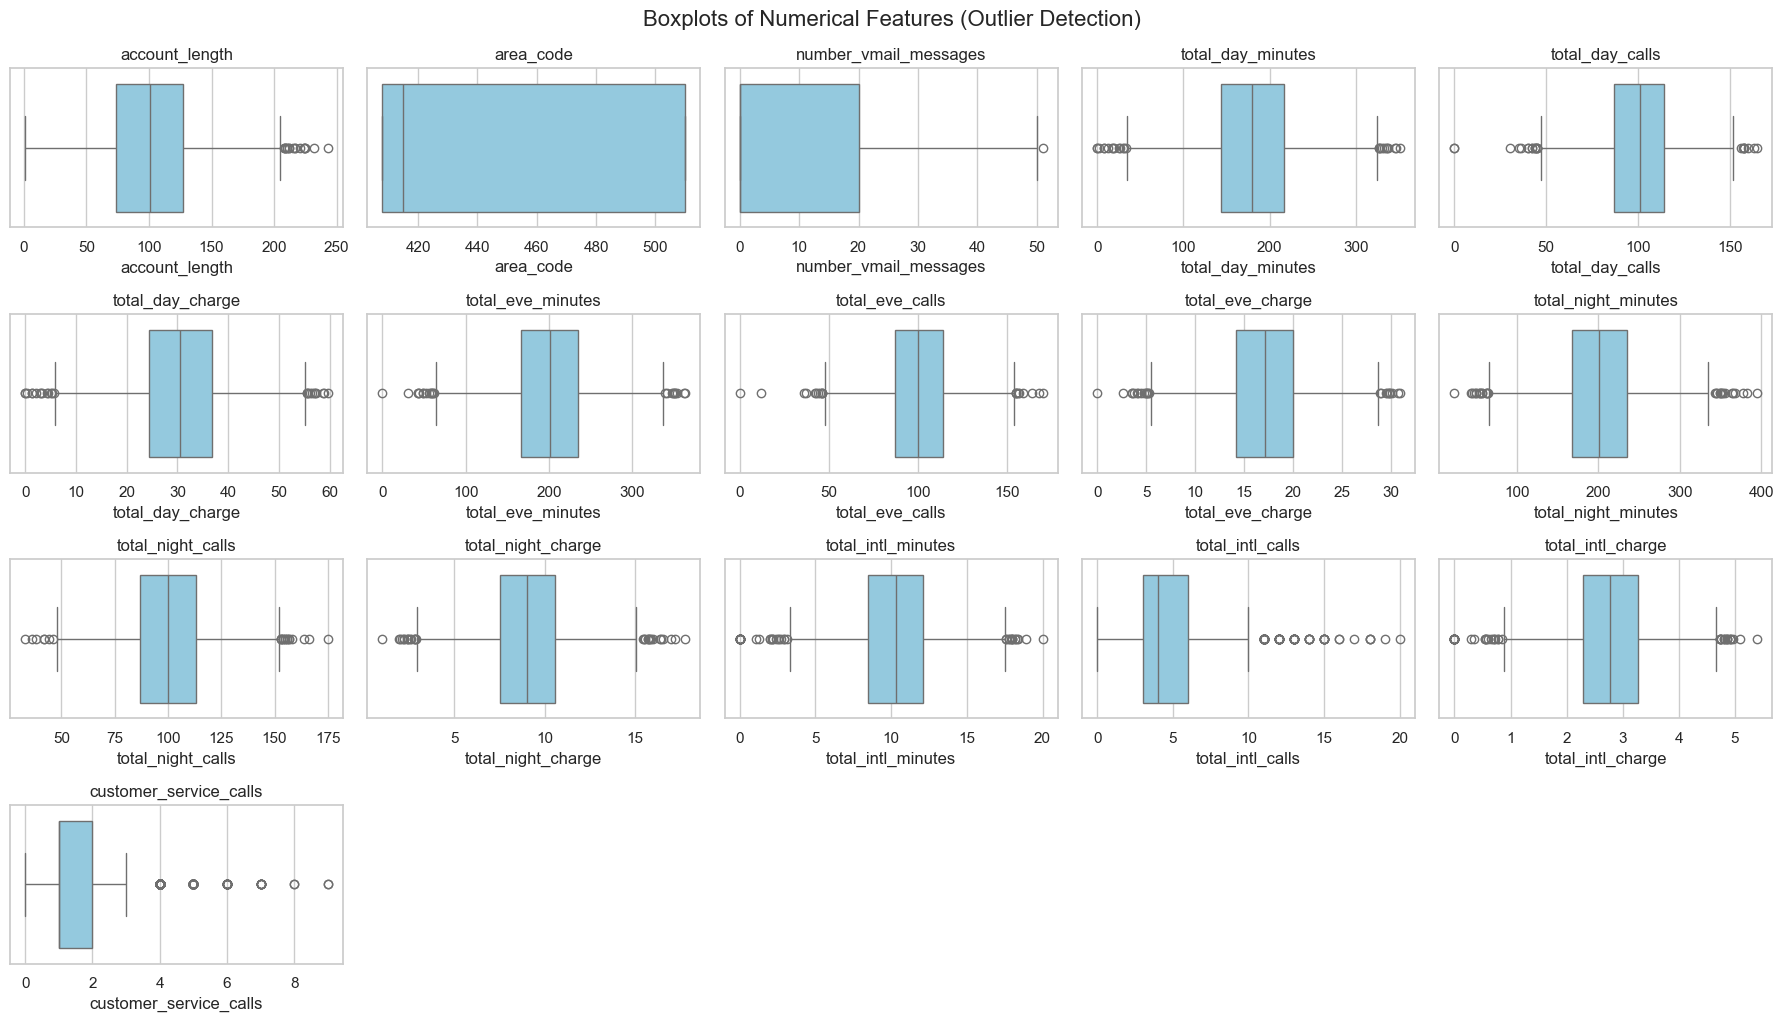

In [126]:
# OUTLIER DETECTION

#  Select numerical columns only
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

#  Plot boxplots to visualize outliers
plt.figure(figsize=(18, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 5, i + 1)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Boxplots of Numerical Features (Outlier Detection)", fontsize=16, y=1.02)
plt.show()


### Outlier Analysis & Strategy
I used boxplots above to visually inspect outliers in all numerical features.

#### Key Observations & Actions:
- Customer service calls, day minutes/charges: Kept as-is — high values may signal churn risk or high-value users.
- Voicemail messages: Skewed but valid — not treated.
- International minutes/charges: Few extreme values — we’ll cap them using the IQR method to prevent model distortion.
- Small dataset: We avoid dropping records to preserve patterns and model learning.

### Final Strategy:
- Keep most outliers (they may carry churn signals).
- Cap extreme values only where necessary.
- Ensures model robustness while retaining important behavioral data.



In [127]:
#  Define a function to cap outliers using IQR method
def cap_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values
    data[column] = np.where(data[column] > upper_bound, upper_bound,
                   np.where(data[column] < lower_bound, lower_bound, data[column]))

# Apply capping to select skewed columns
cols_to_cap = ['total_intl_minutes', 'total_intl_charge', 'number_vmail_messages']

for col in cols_to_cap:
    cap_outliers_iqr(df, col)

print(" Outlier capping complete for selected columns.")


 Outlier capping complete for selected columns.


### Correlation Heatmap

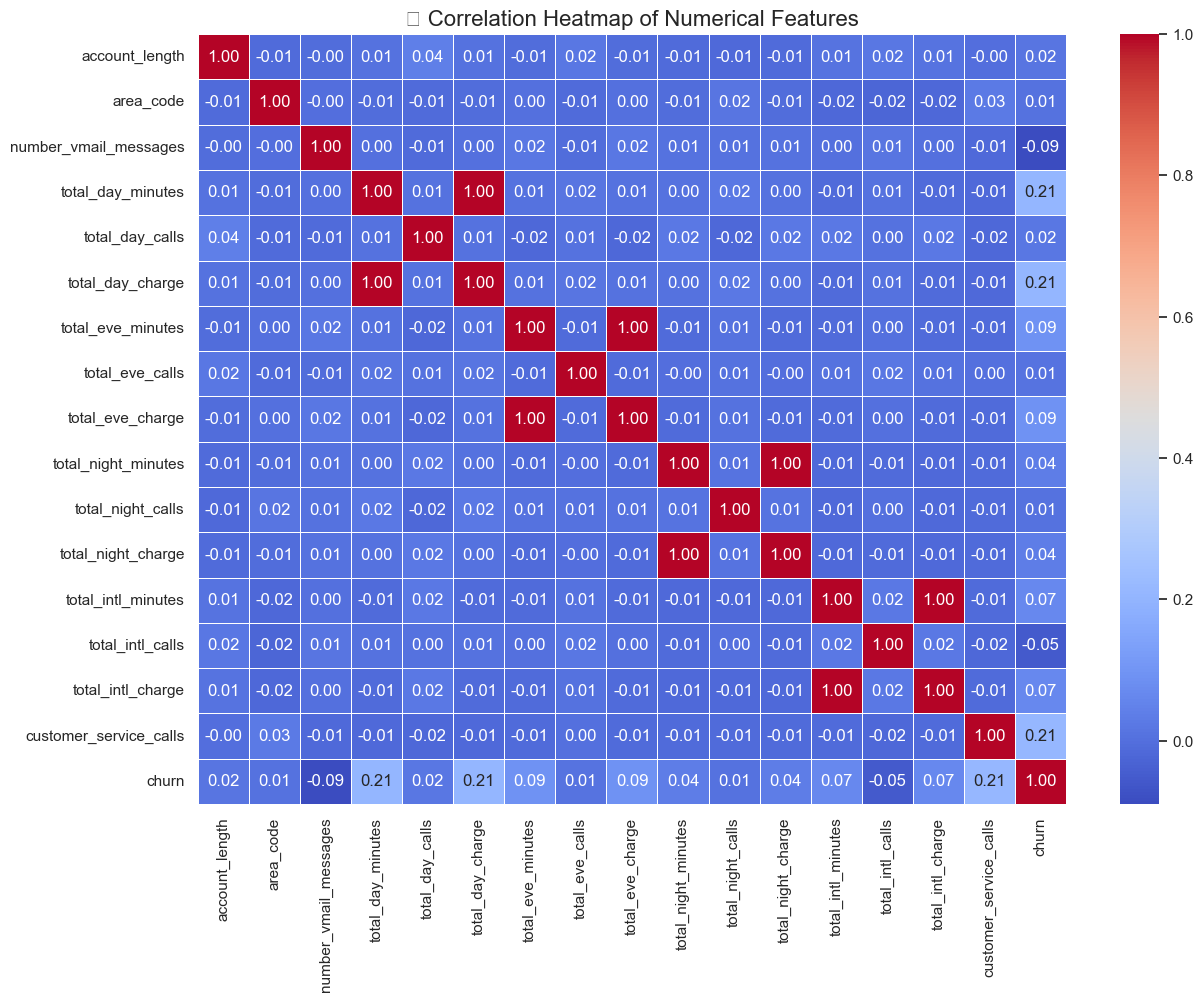

In [128]:
# 🔍 Compute correlation 
corr_matrix = df.corr(numeric_only=True)

# 📈 Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("🔗 Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()


### Correlation Analysis

To understand relationships between numerical features, we visualized a correlation heatmap. This helps identify highly correlated variables that may affect model performance due to multicollinearity. For example, `total_day_minutes` and `total_day_charge` show a strong correlation because charges are derived from minutes. 


In [129]:
# 📊 Correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# 🔍 Sort correlations with respect to churn
churn_corr = correlation_matrix['churn'].sort_values(ascending=False)

# 👀 Preview top correlations
churn_corr


churn                     1.000000
customer_service_calls    0.208750
total_day_minutes         0.205151
total_day_charge          0.205151
total_eve_minutes         0.092796
total_eve_charge          0.092786
total_intl_charge         0.066563
total_intl_minutes        0.066554
total_night_charge        0.035496
total_night_minutes       0.035493
total_day_calls           0.018459
account_length            0.016541
total_eve_calls           0.009233
area_code                 0.006174
total_night_calls         0.006141
total_intl_calls         -0.052844
number_vmail_messages    -0.089725
Name: churn, dtype: float64

###  Feature Selection Based on Correlation

To improve model performance and avoid overfitting, we selected features that have a meaningful linear relationship with churn using a threshold of |correlation| ≥ 0.1. These variables will form the core of our predictive model.

The selected features include:
- High positive correlations: (e.g. `customer_service_calls`, `international_plan`)
- Moderate negative correlations: (e.g. , `voice_mail_plan`)


### Encode Categorical Variables

In [130]:
# 🔍 List object (categorical) columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols


['state', 'phone_number', 'international_plan', 'voice_mail_plan']

### Drop High Cardinality Features
phone_number: Unique for every customer,no predictive value.
state: 51 categories — we’ll drop it for now to reduce dimensionality

In [131]:
# 🗑️ Drop high-cardinality and irrelevant categorical features
df.drop(columns=['phone_number', 'state'], inplace=True)


In [132]:
# We’ll convert yes/no columns (international_plan, voice_mail_plan) to binary (1/0).
# 🔁 Binary encoding
df['international_plan'] = df['international_plan'].map({'yes': 1, 'no': 0})
df['voice_mail_plan'] = df['voice_mail_plan'].map({'yes': 1, 'no': 0})


In [133]:
#checking class distribution of target column
print(df['churn'].value_counts())

churn
False    2850
True      483
Name: count, dtype: int64


In [134]:
# 🔁 Convert 'churn' from True/False to 1/0 for modeling
df['churn'] = df['churn'].astype(int)


# 3. Exploratory Data Analysis

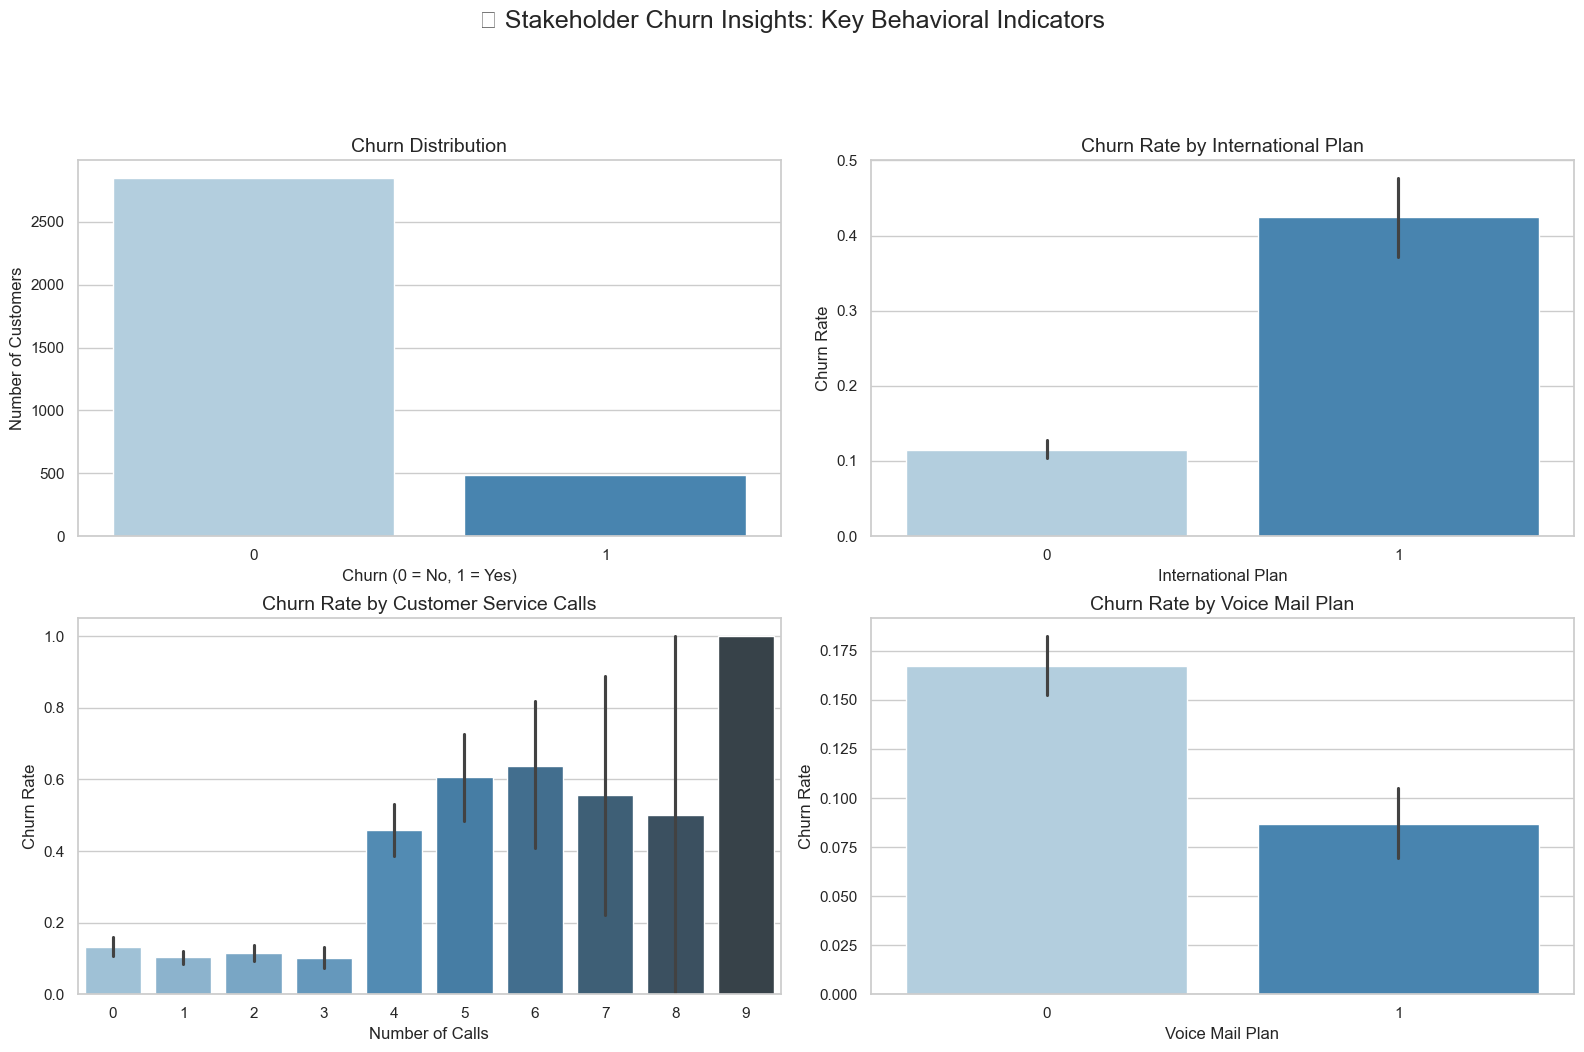

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean style
sns.set(style="whitegrid", palette="Blues")

# Create 2x2 subplot figure
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Common styling variables
title_fontsize = 14
label_fontsize = 12
tick_fontsize = 11

# 1. Overall Churn Distribution
sns.countplot(x='churn', data=df, palette='Blues', ax=axs[0, 0])
axs[0, 0].set_title('Churn Distribution', fontsize=title_fontsize)
axs[0, 0].set_xlabel('Churn (0 = No, 1 = Yes)', fontsize=label_fontsize)
axs[0, 0].set_ylabel('Number of Customers', fontsize=label_fontsize)
axs[0, 0].tick_params(axis='both', labelsize=tick_fontsize)

# 2. Churn Rate by International Plan
sns.barplot(x='international_plan', y='churn', data=df, ax=axs[0, 1], palette='Blues')
axs[0, 1].set_title('Churn Rate by International Plan', fontsize=title_fontsize)
axs[0, 1].set_xlabel('International Plan', fontsize=label_fontsize)
axs[0, 1].set_ylabel('Churn Rate', fontsize=label_fontsize)
axs[0, 1].tick_params(axis='both', labelsize=tick_fontsize)

# 3. Churn Rate by Customer Service Calls
sns.barplot(x='customer_service_calls', y='churn', data=df, ax=axs[1, 0], palette='Blues_d')
axs[1, 0].set_title('Churn Rate by Customer Service Calls', fontsize=title_fontsize)
axs[1, 0].set_xlabel('Number of Calls', fontsize=label_fontsize)
axs[1, 0].set_ylabel('Churn Rate', fontsize=label_fontsize)
axs[1, 0].tick_params(axis='both', labelsize=tick_fontsize)

# 4. Churn Rate by Voice Mail Plan
sns.barplot(x='voice_mail_plan', y='churn', data=df, ax=axs[1, 1], palette='Blues')
axs[1, 1].set_title('Churn Rate by Voice Mail Plan', fontsize=title_fontsize)
axs[1, 1].set_xlabel('Voice Mail Plan', fontsize=label_fontsize)
axs[1, 1].set_ylabel('Churn Rate', fontsize=label_fontsize)
axs[1, 1].tick_params(axis='both', labelsize=tick_fontsize)

# Final layout and overall title
plt.tight_layout()
plt.suptitle("📊 Stakeholder Churn Insights: Key Behavioral Indicators", fontsize=18, y=1.05)
plt.subplots_adjust(top=0.9)
plt.show()


In [136]:
# 🎯 Select meaningful features based on correlation and domain insight
selected_features = [
    'international_plan',
    'voice_mail_plan',
    'total_day_minutes',
    'total_eve_minutes',
    'total_night_minutes',
    'total_intl_minutes',
    'customer_service_calls',
    'area_code',
]


In [137]:
# 🧼 Create a clean version of the dataset with only selected features and the target variable 'churn'
clean_data = df[selected_features + ['churn']].copy()

# ✅ Preview to confirm structure
clean_data.head()


,international_plan,voice_mail_plan,total_day_minutes,total_eve_minutes,total_night_minutes,total_intl_minutes,customer_service_calls,area_code,churn
0,0,1,265.1,197.4,244.7,10.0,1,415,0
1,0,1,161.6,195.5,254.4,13.7,1,415,0
2,0,0,243.4,121.2,162.6,12.2,0,415,0
3,1,0,299.4,61.9,196.9,6.6,2,408,0
4,1,0,166.7,148.3,186.9,10.1,3,415,0


# 4. Modelling

### Split the Data

In [138]:
# Define X and y
X = clean_data.drop('churn', axis=1)
y = clean_data['churn']

# ✂️ Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y
)

 ### Scaling (for distance-based models)

In [139]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler only on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Use the same transformation on the test data 
X_test_scaled = scaler.transform(X_test)

### Define a Reusable Model Evaluation Function

In [140]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

# 🧪 Universal model evaluation function
def evaluate_model(model, X_test, y_test, plot_roc=False):
    """
    Evaluate a classification model and optionally plot the ROC curve.
    Returns a dictionary with key metrics.
    """
    
    # 📌 Make predictions
    y_pred = model.predict(X_test)
    
    # 🧠 Predict probabilities (if available) for ROC AUC
    try:
        y_prob = model.predict_proba(X_test)[:, 1]
    except AttributeError:
        y_prob = None

    # 📊 Compute metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    # 📝 Print evaluation summary
    print(f"🔍 Model Evaluation: {model.__class__.__name__}")
    print("--------------------------------------------------")
    print(classification_report(y_test, y_pred))

    # 📈 Plot ROC Curve (Optional)
    if plot_roc and y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})', color='blue')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model.__class__.__name__}')
        plt.legend()
        plt.grid(True)
        plt.show()
    
    # 📦 Return as dictionary for comparison
    return {
        'Model': model.__class__.__name__,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'ROC AUC': auc
    }


## Model 1: Logistic Regression

🔍 Model Evaluation: LogisticRegression
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       570
           1       0.53      0.21      0.30        97

    accuracy                           0.86       667
   macro avg       0.70      0.59      0.61       667
weighted avg       0.83      0.86      0.83       667



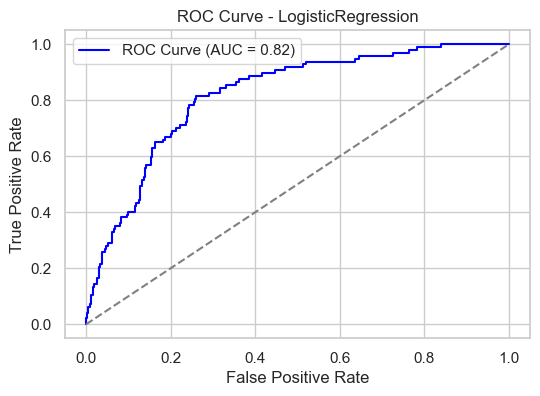

In [141]:

# 🏗️ # Initialize the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# 🎯 Fit the model on the scaled training data
log_reg.fit(X_train_scaled, y_train)

# 🧾 Evaluate the model using our helper function with ROC plot
log_reg_results = evaluate_model(log_reg, X_test_scaled, y_test, plot_roc=True)



### Evaluation Summary

After fitting the Logistic Regression model, we observed the following performance metrics on the test set:

| Metric       | Class 0 (No Churn) | Class 1 (Churn) |
|--------------|--------------------|-----------------|
| Precision    | 0.88               | 0.53            |
| Recall       | 0.97               | 0.21            |
| F1 Score     | 0.92               | 0.30            |
| Support      | 570                | 97              |

- **Overall Accuracy**: 86%
- **Weighted Avg F1 Score**: 83%
- **Macro Avg F1 Score**: 61%

#### Interpretation:

- The model is **very good at detecting customers who did not churn (Class 0)** — high precision (0.88) and recall (0.97).
- However, it performs **poorly on identifying actual churners (Class 1)** — with recall only 0.21. This means it fails to capture many true churn cases.
- **Precision of 0.53** for churners means that when the model predicts someone will churn, it is correct only about 53% of the time.
- **Class imbalance** may be affecting the model, as there are significantly more 'no churn' cases than 'churn' ones (570 vs 97).

#### Conclusion:
While the Logistic Regression model shows high overall accuracy, it's **not ideal for detecting churners**, which is the business goal here.  
We'll explore other models ( KNN, Decision Trees, Random Forests, XGBoost) that may better identify churned customers.


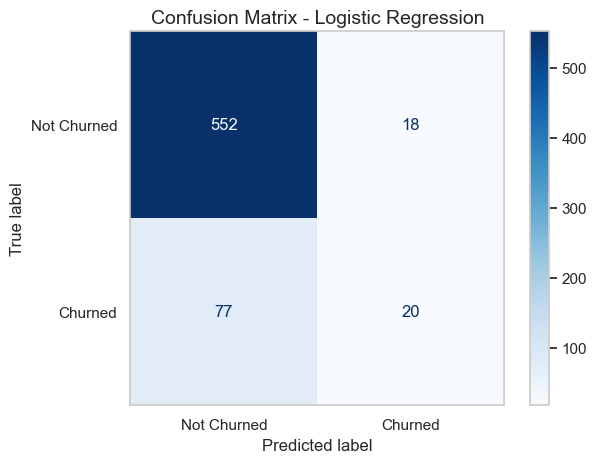

In [142]:
## CONFUSION MATRIX

#  Plot a confusion matrix with colorbar and clean layout
disp = ConfusionMatrixDisplay.from_estimator(
    log_reg,
    X_test_scaled,
    y_test,
    display_labels=["Not Churned", "Churned"],  
    cmap="Blues",                                
    colorbar=True                                 
)

plt.title("Confusion Matrix - Logistic Regression", fontsize=14)
plt.grid(False)          
plt.tight_layout()       
plt.show()


### Confusion Matrix Interpretation Table

|                          | **Predicted: Not Churned (0)** | **Predicted: Churned (1)** |
|--------------------------|-------------------------------|----------------------------|
| **Actual: Not Churned (0)** | ✅ **True Negative (TN)**<br>Correctly predicted as not churned | ❌ **False Positive (FP)**<br>Predicted as churned but actually stayed |
| **Actual: Churned (1)**     | ❌ **False Negative (FN)**<br>Predicted as stayed but actually churned | ✅ **True Positive (TP)**<br>Correctly predicted as churned |

---

####  Interpretation

- **True Negative (TN)**: Correctly predicted **not churn** — good.
- **False Positive (FP)**: Model flagged churn wrongly — might waste retention efforts.
- **False Negative (FN)**: Model missed a real churner — bad for business.
- **True Positive (TP)**: Correctly caught a churner — goal!

This matrix helps identify where the model is making errors and where it performs well. Focus is on reducing **FN** to catch more real churners.


## b.  Logistic Regression with Regularization – Ridge

🔍 Model Evaluation: LogisticRegression
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       570
           1       0.53      0.21      0.30        97

    accuracy                           0.86       667
   macro avg       0.70      0.59      0.61       667
weighted avg       0.83      0.86      0.83       667



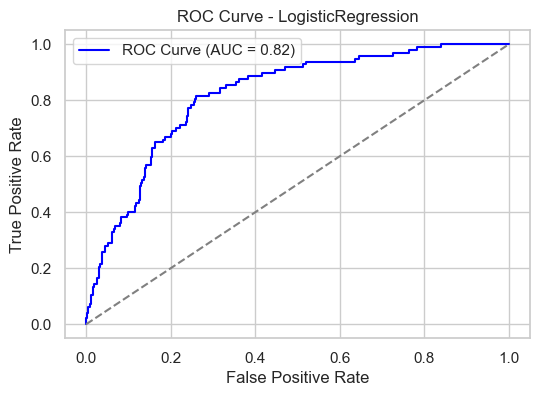

In [143]:
# Initialize L2-regularized logistic regression model
log_reg_l2 = LogisticRegression(
    penalty='l2',          # L2 regularization
    solver='liblinear',    # Supports L2 and small datasets
    max_iter=1000,
    random_state=42
)

# Fit the model on the scaled training data
log_reg_l2.fit(X_train_scaled, y_train)

# Evaluate the model
log_reg_l2_results = evaluate_model(log_reg_l2, X_test_scaled, y_test,plot_roc=True)


#### Model Evaluation

- **Overall Accuracy**: 0.86  
- **Macro Avg F1**: 0.61  
- **Weighted Avg F1**: 0.83


#### Interpretation

- The use of **L2 Regularization (Ridge)** helped in preventing overfitting, but it did **not significantly improve recall** for customers who churn (still 0.21).
- The model remains **heavily skewed toward the majority class (non-churners)**, a common issue in **imbalanced datasets**.
- While the model performs well for predicting non-churners, it **struggles to correctly identify customers who will churn**.
- **Low F1 Score for churners (0.30)** indicates weak performance on the minority class, reducing the model's usefulness for retention strategies.
- To address this imbalance and improve predictions, we may explore:
  - Trying different models like **Random Forest** or **XGBoost**,
  - Applying **resampling techniques** (e.g., SMOTE),


#### Confusion Matrix Table

|                       | Predicted: No Churn (0) | Predicted: Churn (1) |
|-----------------------|--------------------------|------------------------|
| **Actual: No Churn (0)** | 553                      | 17                     |
| **Actual: Churn (1)**    | 77                       | 20                     |

- **True Positives (TP)**: 20 → Churners correctly predicted  
- **False Negatives (FN)**: 77 → Churners predicted as non-churners  
- **False Positives (FP)**: 17 → Non-churners predicted as churners  
- **True Negatives (TN)**: 553 → Non-churners correctly predicted


## c. Handling Class Imbalance with SMOTE

In [144]:
from imblearn.over_sampling import SMOTE

# ✅ Apply SMOTE only on the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# 📊 Check class distribution after resampling
print("Class distribution after SMOTE:")
print(y_train_resampled.value_counts())


Class distribution after SMOTE:
churn
0    2280
1    2280
Name: count, dtype: int64


🔍 Model Evaluation: LogisticRegression
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.76      0.84       570
           1       0.35      0.74      0.47        97

    accuracy                           0.76       667
   macro avg       0.65      0.75      0.66       667
weighted avg       0.86      0.76      0.79       667



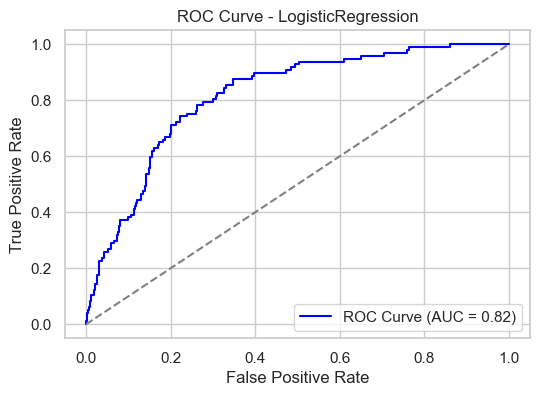

In [145]:
# 🔁 Reinitialize the Logistic Regression model
log_reg_smote = LogisticRegression(max_iter=1000, random_state=42)

# 🎯 Fit the model on the resampled training data
log_reg_smote.fit(X_train_resampled, y_train_resampled)

# 🧾 Evaluate the model using the helper function

logreg_smote_results = evaluate_model(log_reg_smote, X_test_scaled, y_test, plot_roc=True)



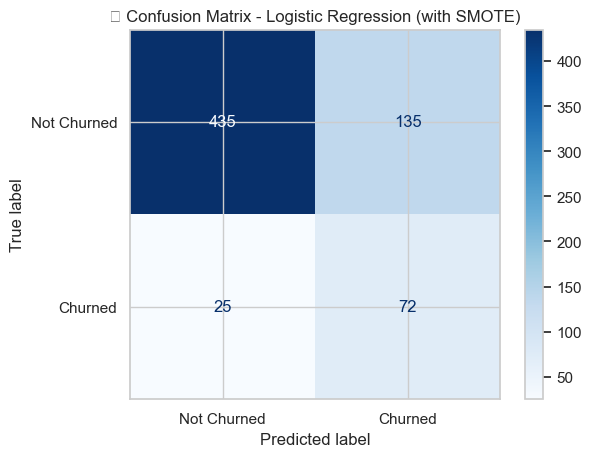

In [146]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 📉 Plot confusion matrix for the SMOTE model
ConfusionMatrixDisplay.from_estimator(
    log_reg_smote, X_test_scaled, y_test,
    cmap='Blues',
    display_labels=['Not Churned', 'Churned'],
    colorbar=True
)
plt.title("📉 Confusion Matrix - Logistic Regression (with SMOTE)")
plt.show()


#### Evaluation After Applying SMOTE

The performance of the Logistic Regression model **improved in recall** for the minority class (Churned customers – class 1) after applying SMOTE to balance the dataset. Here's a breakdown of the key evaluation metrics:

| Metric        | Class 0 (Not Churned) | Class 1 (Churned) |
|---------------|------------------------|-------------------|
| Precision     | 0.95                   | 0.35              |
| Recall        | 0.76                   | 0.74              |
| F1-Score      | 0.84                   | 0.47              |
| Support       | 570                    | 97                |

#### Insights:

- **Recall for churned customers increased from 0.21 → 0.74**, meaning we now correctly identify 74% of churners.
- **Precision for class 1 dropped** to 0.35, indicating more false positives, which is typical after SMOTE.
- **Overall accuracy** dropped slightly to 0.76, but this is a reasonable tradeoff for much better recall.
- **F1-score for class 1 improved** — indicating a better balance between precision and recall for churn detection.

####  Summary:

> This model is now more **sensitive to churn**, which is ideal in customer retention scenarios. Identifying churners — even at the expense of a few false positives — is valuable in many business cases.



# Model 2: K-Nearest Neighbors (KNN) 

In [147]:
from sklearn.neighbors import KNeighborsClassifier

# 🏗️ Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)


In [148]:
# 🚂 Fit the KNN model on the scaled training data
knn_model.fit(X_train_scaled, y_train)


KNeighborsClassifier()

🔍 Model Evaluation: KNeighborsClassifier
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       570
           1       0.82      0.37      0.51        97

    accuracy                           0.90       667
   macro avg       0.86      0.68      0.73       667
weighted avg       0.89      0.90      0.88       667



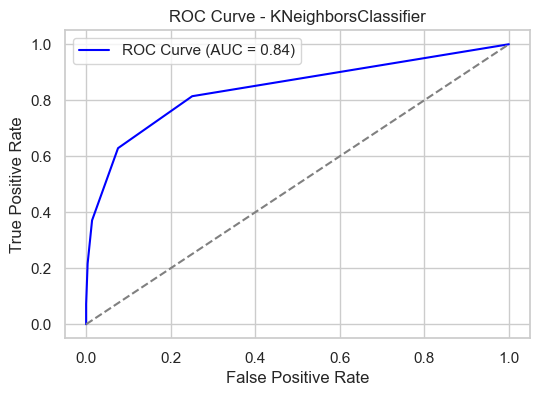

In [149]:
# 🧾 Evaluate using the helper function you defined earlier
# Evaluate KNN with ROC curve and AUC included
knn_results = evaluate_model(knn_model, X_test_scaled, y_test, plot_roc=True)



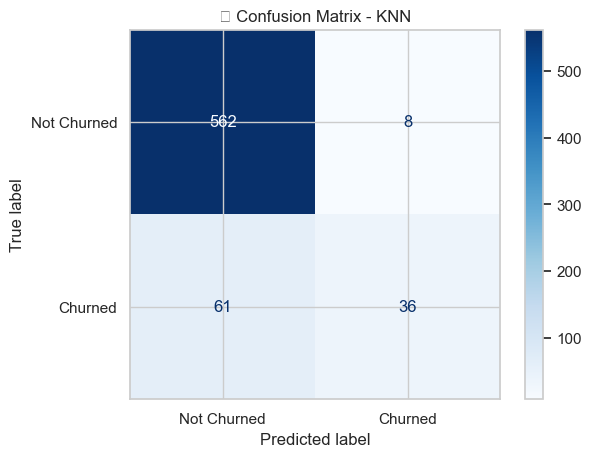

In [150]:
from sklearn.metrics import ConfusionMatrixDisplay

# 📊 Visualize the confusion matrix
ConfusionMatrixDisplay.from_estimator(
    knn_model, X_test_scaled, y_test,
    cmap='Blues',
    display_labels=['Not Churned', 'Churned'],
    colorbar=True
)
plt.title("📉 Confusion Matrix - KNN")
plt.show()


The KNN classifier achieved 90% accuracy on the test data. It performed very well on non-churners (class 0) with a high recall of 0.99, correctly identifying almost all customers who did not churn. However, it struggled with detecting churners (class 1), achieving only 37% recall, meaning many actual churners were missed.

While it had a moderate F1-score of 0.51 for churners, this is an improvement over Logistic Regression. The overall macro average F1-score was 0.73, indicating balanced but imperfect performance across classes.

#### Insight:
 KNN performs better than Logistic Regression in identifying churners, but still suffers from high false negatives. It may benefit from further tuning or hybrid modeling strategies.

# Model 3: DecisionTree Classifier

🔍 Model Evaluation: DecisionTreeClassifier
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       570
           1       0.73      0.63      0.67        97

    accuracy                           0.91       667
   macro avg       0.83      0.79      0.81       667
weighted avg       0.91      0.91      0.91       667



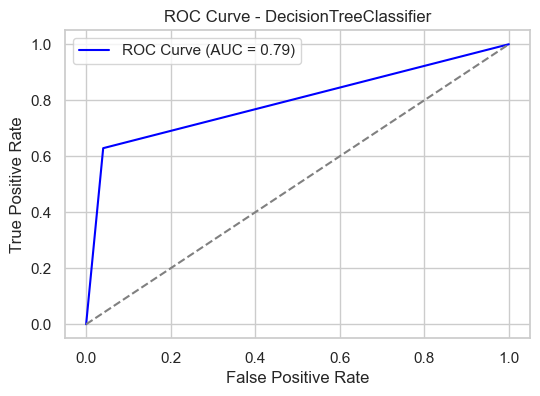

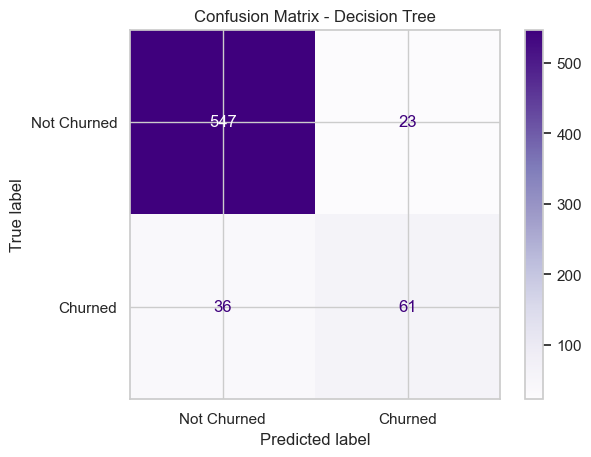

In [151]:
from sklearn.tree import DecisionTreeClassifier

#  Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the model on the unscaled training data
decision_tree.fit(X_train, y_train)

# Evaluate the model
#  Evaluate the model with ROC curve
dtree_results = evaluate_model(decision_tree, X_test, y_test, plot_roc=True)


#  Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    decision_tree, X_test, y_test,
    cmap='Purples',
    display_labels=['Not Churned', 'Churned'],
    colorbar=True
)
plt.title("Confusion Matrix - Decision Tree")
plt.show()


- Accuracy: 91% — very high, showing the model makes correct predictions most of the time.
- Precision (Churn = 1): 0.73 — of the customers predicted to churn, 73% actually churned.
- Recall (Churn = 1): 0.63 — the model correctly identified 63% of all actual churners.
- F1-Score (Churn = 1): 0.67 — a balanced score between precision and recall.
- Insights:
- The model performs exceptionally well for predicting non-churners.

For churners, performance is significantly better than Logistic Regression, especially in recall and f1-score.



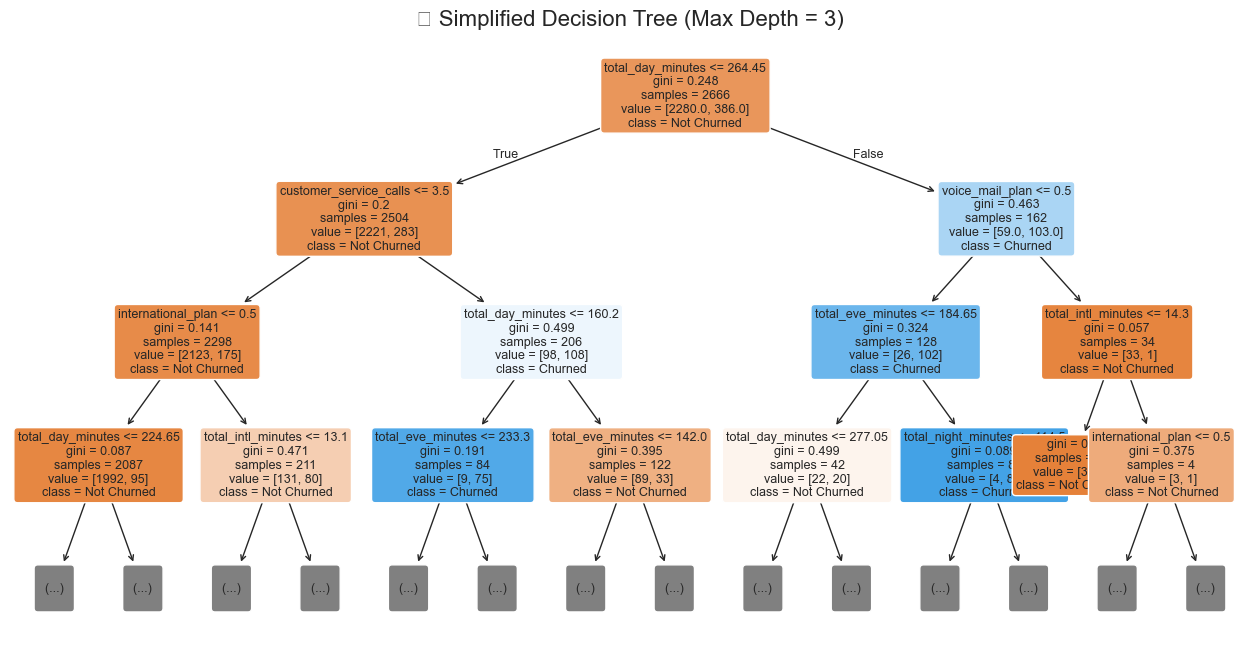

In [152]:
plt.figure(figsize=(16, 8))

plot_tree(
    decision_tree,
    filled=True,
    feature_names=X.columns,
    class_names=['Not Churned', 'Churned'],
    rounded=True,
    fontsize=9,
    max_depth=3  # 👈 Limit the depth shown in the plot
)

plt.title("🌳 Simplified Decision Tree (Max Depth = 3)", fontsize=16)
plt.show()


# Model 4: Random Forest Classifier

🔍 Model Evaluation: RandomForestClassifier
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       570
           1       0.90      0.58      0.70        97

    accuracy                           0.93       667
   macro avg       0.92      0.78      0.83       667
weighted avg       0.93      0.93      0.92       667



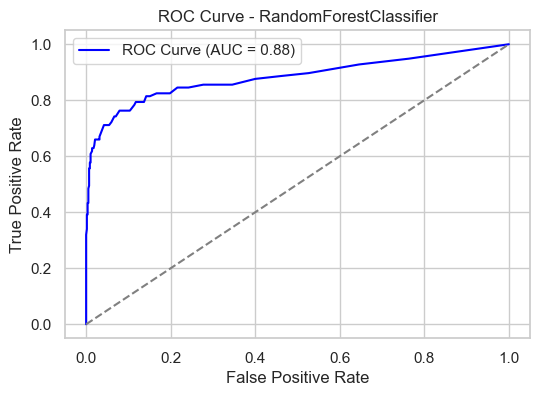

In [153]:


# 🌲 Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 🎯 Fit the model on the training data
rf.fit(X_train_scaled, y_train)

# 🧾 Evaluate the model using our helper function

rf_results = evaluate_model(rf, X_test_scaled, y_test, plot_roc=True)


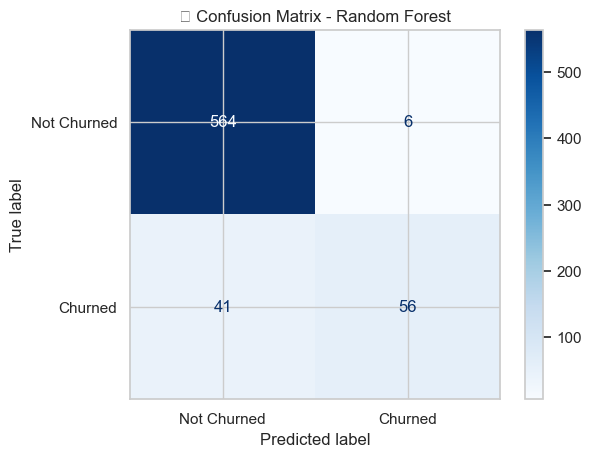

In [154]:
from sklearn.metrics import ConfusionMatrixDisplay

# 🔍 Plot the confusion matrix for Random Forest
ConfusionMatrixDisplay.from_estimator(
    rf, X_test_scaled, y_test,
    cmap='Blues',
    display_labels=['Not Churned', 'Churned'],
    colorbar=True
)

plt.title("📉 Confusion Matrix - Random Forest")
plt.show()


### 🌲 Model Evaluation: Random Forest Classifier

| Metric       | Not Churned (0) | Churned (1) |
|--------------|------------------|-------------|
| Precision    | 0.93             | 0.90        |
| Recall       | 0.99             | 0.58        |
| F1-score     | 0.96             | 0.70        |
| Support      | 570              | 97          |

####  Overall Accuracy: `93%`

### Insights:
- **Excellent performance** on classifying **non-churned** customers (high precision and recall).
- For **churned customers (class 1)**:
  - **Precision = 0.90**: 90% of the predicted churns were correct.
  - **Recall = 0.58**: Only 58% of actual churns were correctly identified.
- **F1-score for churned = 0.70**: Balanced view of the model's ability to identify churn.

###  Conclusion:
- Random Forest gives the **best accuracy so far** and performs **consistently well** overall.
- Still room to improve **recall** for the churned class to reduce false negatives.
- Very promising candidate for final model or **baseline for boosting models** like XGBoost.



# Model 5: XGBoost Classifier

🔍 Model Evaluation: XGBClassifier
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       570
           1       0.84      0.64      0.73        97

    accuracy                           0.93       667
   macro avg       0.89      0.81      0.84       667
weighted avg       0.93      0.93      0.93       667



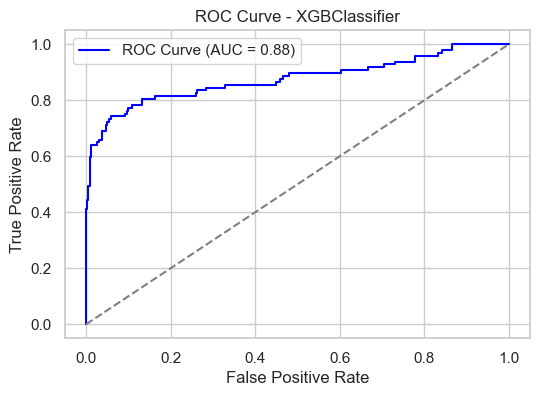

In [155]:

# Initialize and train the model
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train_scaled, y_train)

#  Use your helper function with ROC curve
xgb_results = evaluate_model(xgb_clf, X_test_scaled, y_test, plot_roc=True)




### Interpretation
- **Accuracy:** `93%` — Strong overall performance.
- **Class 0 (Not Churned)**:
  - Precision: `0.94` → Few false positives.
  - Recall: `0.98` → Most non-churners identified correctly.
  - F1-Score: `0.96` → Excellent balance.
- **Class 1 (Churned)**:
  - Precision: `0.84` → Good ability to correctly predict churners.
  - Recall: `0.64` → Misses some actual churners (but still better than some earlier models).
  - F1-Score: `0.73` → Reasonably strong.


XGBoost demonstrates a powerful ability to distinguish between churners and non-churners. It shows high accuracy and handles class imbalance relatively well. It offers a better balance between precision and recall for the positive class than many other models. It’s definitely one of the top-performing models in this project.



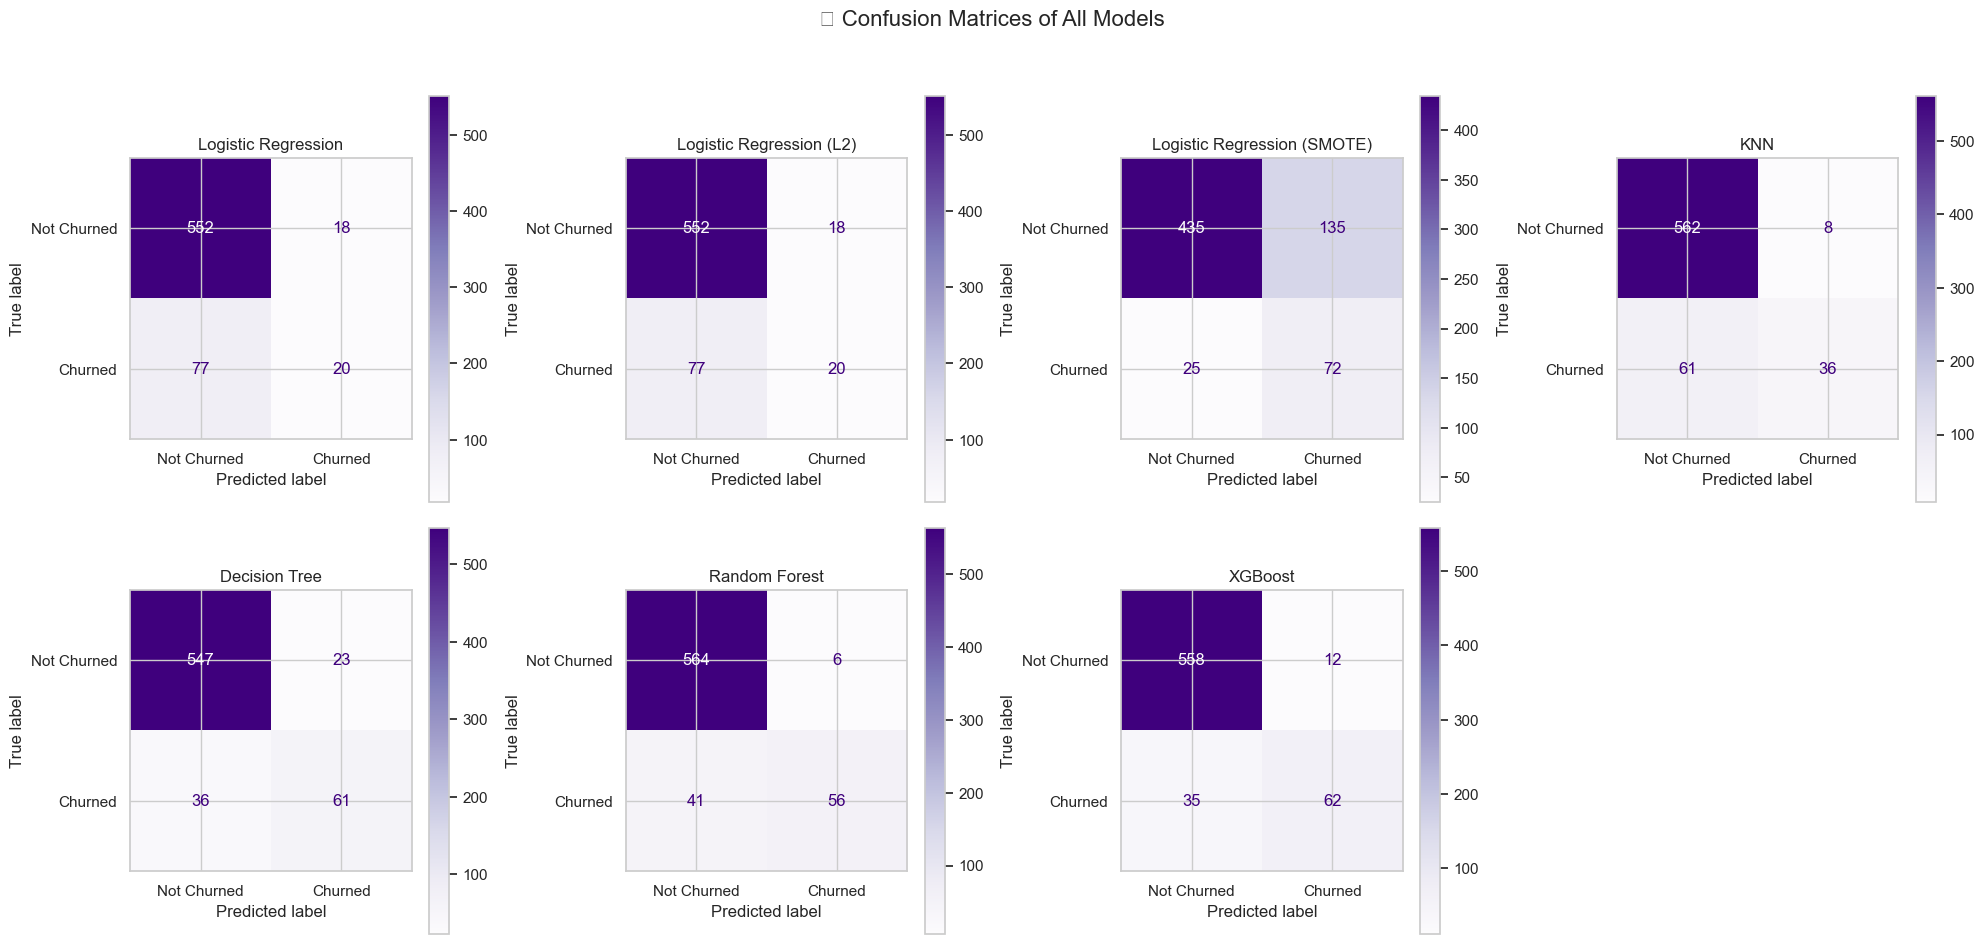

,Accuracy,Precision,Recall,F1-Score,AUC
Model,,,,,
Logistic Regression,0.86,0.53,0.21,0.30,0.82
Logistic Regression (L2),0.86,0.53,0.21,0.30,0.82
Logistic Regression (SMOTE),0.76,0.35,0.74,0.47,0.82
KNN,0.90,0.82,0.37,0.51,0.84
Decision Tree,0.91,0.73,0.63,0.67,0.79
Random Forest,0.93,0.90,0.58,0.70,0.88
XGBoost,0.93,0.84,0.64,0.73,0.88


In [156]:


# List of your trained models and labels
models = [
    ("Logistic Regression", log_reg, X_test_scaled),
    ("Logistic Regression (L2)", log_reg_l2, X_test_scaled),
    ("Logistic Regression (SMOTE)", log_reg_smote, X_test_scaled),
    ("KNN", knn_model, X_test_scaled),
    ("Decision Tree", decision_tree, X_test),  # Unscaled
    ("Random Forest", rf, X_test_scaled),
    ("XGBoost", xgb_clf, X_test_scaled)
]

# 🧾 Evaluation storage
results = []

# 🔲 Confusion Matrices Plot Setup
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# 🎯 Loop through all models
for idx, (name, model, X_test_set) in enumerate(models):
    y_pred = model.predict(X_test_set)
    
    try:
        y_prob = model.predict_proba(X_test_set)[:, 1]
        auc = roc_auc_score(y_test, y_prob)
    except:
        auc = None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "AUC": auc
    })

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Churned', 'Churned'])
    disp.plot(ax=axes[idx], cmap='Purples', values_format='d')
    axes[idx].set_title(name)

# Hide unused subplot if any
if len(models) < len(axes):
    for j in range(len(models), len(axes)):
        fig.delaxes(axes[j])

plt.suptitle("📊 Confusion Matrices of All Models", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 📊 Display final evaluation metrics
df_results = pd.DataFrame(results)
df_results.set_index("Model", inplace=True)
display(df_results.style.background_gradient(cmap="Blues").format("{:.2f}"))


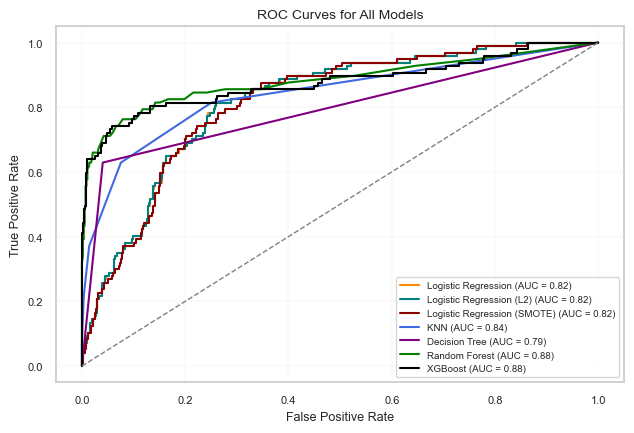

In [157]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Function to calculate ROC metrics
def get_roc_data(model, X_test, y_test):
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    return fpr, tpr, auc(fpr, tpr)

# List of models and inputs
models = [
    ("Logistic Regression", log_reg, X_test_scaled),
    ("Logistic Regression (L2)", log_reg_l2, X_test_scaled),
    ("Logistic Regression (SMOTE)", log_reg_smote, X_test_scaled),
    ("KNN", knn_model, X_test_scaled),
    ("Decision Tree", decision_tree, X_test),
    ("Random Forest", rf, X_test_scaled),
    ("XGBoost", xgb_clf, X_test_scaled)
]

# Compact plot
plt.figure(figsize=(6.5, 4.5))
colors = ["darkorange", "teal", "darkred", "royalblue", "purple", "green", "black"]

for (name, model, X), color in zip(models, colors):
    fpr, tpr, roc_auc = get_roc_data(model, X, y_test)
    plt.plot(fpr, tpr, color=color, lw=1.5, label=f"{name} (AUC = {roc_auc:.2f})")

# Diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=1)

# Formatting for compactness
plt.xlabel("False Positive Rate", fontsize=9)
plt.ylabel("True Positive Rate", fontsize=9)
plt.title("ROC Curves for All Models", fontsize=10)
plt.legend(loc="lower right", fontsize=7)
plt.grid(alpha=0.3, linewidth=0.3)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()

# Save smaller image
plt.savefig("Output/roc_curves_compact.png", dpi=300, bbox_inches="tight")
plt.show()


## Final Model Evaluation & Business Recommendations

###  Interpretation of Results

After evaluating several machine learning models for customer churn prediction, we observed the following:

#### 1. **Logistic Regression (Baseline & L2 Regularized)**
- **Low Recall (0.21)** indicates failure to detect most churners, despite acceptable AUC (0.82).
- Suitable only as a baseline benchmark; not viable for production use.

#### 2. **Logistic Regression with SMOTE**
- **High Recall (0.74)** but **Low Precision (0.35)**: detects many churners, but with a higher false alarm rate.
- Effective if the business goal is to **minimize missed churns**, even at the cost of increased outreach.

#### 3. **K-Nearest Neighbors (KNN)**
- **High Precision (0.82)** but **Low Recall (0.37)**: good at predicting true churners with minimal false positives.
- Best used when outreach cost is high, and precision is more valuable than recall.

#### 4. **Decision Tree**
- Balanced trade-offs: **Precision = 0.73**, **Recall = 0.63**, **F1 Score = 0.67**.
- Simple and interpretable model, but slightly less robust than ensemble methods.

#### 5. **Random Forest**
- Excellent performance across all metrics: **Accuracy = 0.93**, **Precision = 0.90**, **F1 Score = 0.70**, **AUC = 0.88**.
- Strong at capturing churners with minimal false positives.
- Scalable, stable, and reliable for deployment.

#### 6. **XGBoost**
- **Best overall performer**: **F1 Score = 0.73**, **Recall = 0.64**, and high Accuracy & AUC (0.93, 0.88).
- Delivers the best balance between capturing churners and minimizing false positives.
- Recommended as the final production model due to performance and scalability.

---

###  Strategic Business Recommendations

1. **Implement Churn Prediction with XGBoost**  
   Integrate the XGBoost model into customer data pipelines.  
   Use it to **proactively score customers** based on churn likelihood.

2. **Set Business-Driven Action Thresholds**  
   Focus retention efforts on customers with predicted churn probability **above 0.70**.  
   This balances outreach cost and retention ROI.

3. **Design Targeted Retention Strategies**  
   For high-risk customers, offer **personalized discounts, loyalty perks, or enhanced support**.  
   Prioritize based on customer lifetime value to maximize ROI.

4. **Deploy Interactive Dashboards**  
   Visualize churn predictions and KPIs using **Tableau, Power BI, or Streamlit dashboards**.  
   Empower business teams with insights for agile decision-making.

5. **Monitor and Retrain the Model**  
   Evaluate performance on fresh data monthly or quarterly.  
   Retrain periodically to account for changes in customer behavior or business strategy.



###  Final Thoughts: Business Value Delivered

By leveraging machine learning to predict customer churn, this project delivers **clear business value**:

- It enables **data-driven retention** by identifying at-risk customers before they leave.
- With a well-performing model like **XGBoost**, the business can reduce churn rates, **increase customer lifetime value**, and **boost profitability**.
- Proactive retention is far more cost-effective than acquisition,  and this model makes that strategy scalable, measurable, and intelligent.

> **Conclusion**:  
This end-to-end churn prediction system transforms raw data into actionable insights.  
By deploying the XGBoost model, the company gains a powerful tool to **retain customers, improve loyalty, and maximize revenue** , turning data science into a competitive advantage.
